In [ ]:
# based on the following tutorial
# https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_linear_regression/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

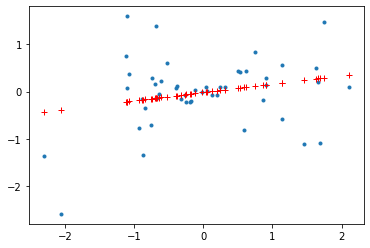

In [3]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)
# plot points
plt.plot(x,y,'.')
# plot line fit
y_fit = np.polyfit(x,y,1)
plt.plot(x,y_fit[0]*x+y_fit[1], 'r+')
plt.show()